In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
data=pd.read_csv('ec_data.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [44]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [45]:
X=data[['temperature','humidity','wind_speed','solar_irradiance']].values
Y=data[['energy_consumption']].values

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [47]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [48]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),# Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [50]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_split=0.5,verbose=1) #epoch is times jitni baar train hoga amd verbose is iteration

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 85035.7344 - val_accuracy: 0.0000e+00 - val_loss: 91590.5781
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 87833.1328 - val_accuracy: 0.0000e+00 - val_loss: 91184.1406
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 82003.7188 - val_accuracy: 0.0000e+00 - val_loss: 90638.1484
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 85335.2266 - val_accuracy: 0.0000e+00 - val_loss: 89882.4219
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 83032.2578 - val_accuracy: 0.0000e+00 - val_loss: 88843.2969
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 82496.0312 - val_accuracy: 0.0000e+00 - val_loss: 87481.4609
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 80108.9922 - val_accuracy: 0.0000e+00 - val_loss: 85715.6875
Epoch

In [51]:
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 83811.8672 
Test Mean Absolute Error: 0.00


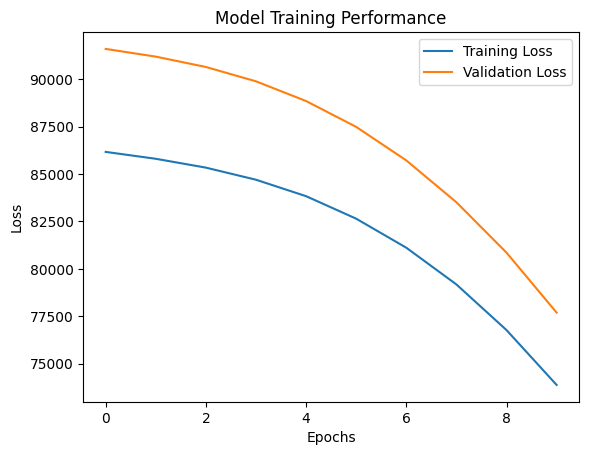

In [52]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [53]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[26.59635 ],
       [22.422838],
       [22.51706 ],
       [17.334528],
       [35.651142],
       [28.100725],
       [34.365116],
       [27.337332],
       [28.786509],
       [24.35992 ],
       [23.988546],
       [22.205488],
       [29.045137],
       [25.25323 ],
       [44.161076],
       [30.623167],
       [23.210314],
       [31.913519],
       [27.457308],
       [23.803724],
       [22.22002 ],
       [27.823034],
       [38.027676],
       [31.971838],
       [29.783907],
       [24.607855],
       [24.729376],
       [29.399906],
       [29.278559],
       [24.942854],
       [24.645975],
       [36.331165],
       [42.560673],
       [27.466122],
       [39.415367],
       [29.197897],
       [20.298716],
       [25.540976],
       [42.519604],
       [23.234259],
       [29.20024 ],
       [22.03289 ],
       [28.955042],
       [33.710316],
       [27.541258],
       [24.500912],
       [24.009169],
       [22.984118],
       [28.606157],
       [28.838255],


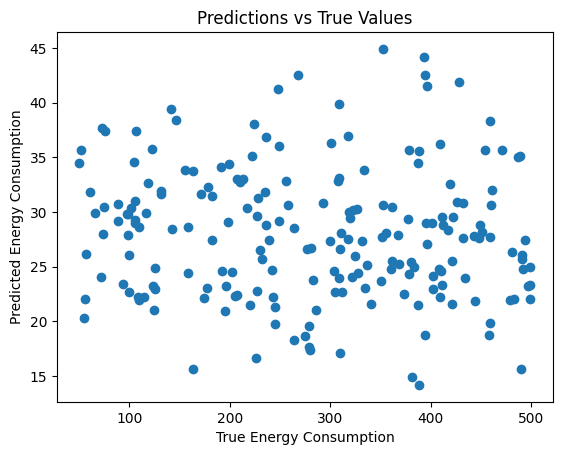

In [54]:
plt.scatter(Y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()